# Analysis of GERP scores

* GERP scores describe the level of conservedness of a given position in a genome
* Negative scores indicate that this position evolves fast, positive scores indicate that it evolves slow
* This can tell us something about how important a certain stretch of DNA is for the organism, for example if a certain gene needs to be kept intact for the organism to be healthy, it will evolve slowly

In [1]:
import gzip
import pandas as pd
import numpy as np
import glob, os
import matplotlib.pyplot as plt

The dataset was downloaded from _mendel.stanford.edu/SidowLab/downloads/gerp/_ and processed with an in-house analysis pipeline (not yet publicly available). The data processing and analysis was done with the Elephant genome as reference.

Read the GERP scores into a DataFrame

In [33]:
with gzip.open("/Users/verenakutschera/Dropbox/Projects/Miscellanea/Workshops/meetup_Python_DataAnalysis/data/reference_gerp.ancestral.rates.gz") as gerp:
    gerpDF = pd.read_table(gerp, names=["chr", "position", "ancestral_state", "gerp_score"])
    gerpDF['gerp_score'] = gerpDF['gerp_score'].astype(float)
gerpDF.head()

,chr,position,ancestral_state,gerp_score
0,contig5,1,N,0.0
1,contig5,2,N,0.0
2,contig5,3,N,0.0
3,contig5,4,N,0.0
4,contig5,5,N,0.0


### Create a "Manhattan plot"
* X axis shows position in the DNA sequence (chromosomes and position)
* Y axis with some genetic statistic or data property

Add an extra column with a running index to have control over the x labels locations when plotting

In [27]:
gerpDF['ind'] = range(len(gerpDF)) 

Group by chromosome

In [31]:
gerpDF_grouped = gerpDF.groupby(('chr'))
gerpDF_grouped['gerp_score'].describe()

,count,mean,std,min,25%,50%,75%,max
chr,,,,,,,,
contig1,38616.0,0.002960,0.049011,-1.26,0.0,0.0,0.0,1.010
contig2,32453.0,0.002441,0.049805,-0.75,0.0,0.0,0.0,1.460
contig3,52344.0,0.008878,0.091860,-2.52,0.0,0.0,0.0,1.590
contig4,41519.0,0.005722,0.085523,-1.52,0.0,0.0,0.0,2.600
contig5,25406.0,0.002044,0.033381,-1.26,0.0,0.0,0.0,0.629


In [36]:
for num, (name, group) in enumerate(gerpDF_grouped):
    print(num)
    print(name)
    print(group.head())

0
contig1
           chr  position ancestral_state  gerp_score    ind
25406  contig1         1               N         0.0  25406
25407  contig1         2               N         0.0  25407
25408  contig1         3               N         0.0  25408
25409  contig1         4               N         0.0  25409
25410  contig1         5               N         0.0  25410
1
contig2
           chr  position ancestral_state  gerp_score    ind
64022  contig2         1               N         0.0  64022
64023  contig2         2               N         0.0  64023
64024  contig2         3               N         0.0  64024
64025  contig2         4               N         0.0  64025
64026  contig2         5               N         0.0  64026
2
contig3
           chr  position ancestral_state  gerp_score    ind
96475  contig3         1               N         0.0  96475
96476  contig3         2               N         0.0  96476
96477  contig3         3               N         0.0  96477
96478  con

Text(0,0.5,'GERP++ score')

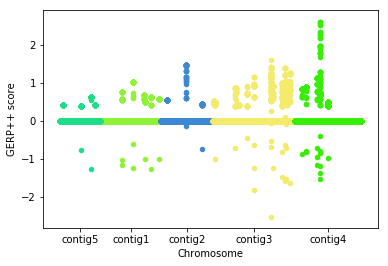

In [32]:
from random import randint

fig = plt.figure()
ax = fig.add_subplot(111)

# Create a list of random RGB colors, as many colors as there are chromosomes
colors = []
for i in range(len(gerpDF_grouped)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

# Create a plot with the different chromosomes separately colored
for num, (name, group) in enumerate(gerpDF_grouped):
    group.plot(kind='scatter', x='ind', y='gerp_score', color=colors[num % len(colors)], ax=ax)

# Set x labels and their position
chromDF=gerpDF.groupby('chr')['ind'].median()
ax.set_xticks(chromDF)
ax.set_xticklabels(chromDF.index)

# label the axes
ax.set_xlabel('Chromosome')
ax.set_ylabel('GERP++ score')